# This file works with FILAMENT ERUPTION and October 2013 Track information 

In [1]:
###### This is a practice file, containing 
#Week 1: Filtering filament eruption data to unique data
#Week 2: 
from sunpy.net import hek
from sunpy.net import hek2vso
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib qt
import shapely
from shapely.wkt import dumps, loads
import numpy as np
import pandas as pd
from shapely.geometry.polygon import LinearRing, Polygon
from datetime import timedelta
import datetime
from sunpy.time import *
from dateutil.parser import parse
import matplotlib.cm as cm
import matplotlib as mpl
from operator import itemgetter
from itertools import groupby
import itertools
import operator
from datetime import timedelta
import csv

In [2]:
###### the following is the code ashna has written to filter out single filament eruptions recorded at different wavelengths
client = hek.HEKClient()
h2v = hek2vso.H2VClient()
tstart = '2013/10/01 00:00:00'
tend = '2013/10/31 23:59:59'
event_type = 'FE'
eruptions = client.query(hek.attrs.Time(tstart,tend),hek.attrs.EventType(event_type))
vso_records = h2v.translate_and_query(eruptions[10])



In [3]:
 ###Kathy's Plotting function    
def TotalSunPlot(eruptions_good, eruptions_okay, trackno, filament):
    plt.grid(True)
    plt.ylabel('ycoord (arcsec)',fontsize=18)
    plt.xlabel('xcoord (arcsec)',fontsize=18)
    plt.axis([-1500, 1500, -1500, 1500]) 
    longitude2 = [elem["hpc_x"] for elem in eruptions_okay]
    latitude2 = [elem["hpc_y"] for elem in eruptions_okay]
    fig=plt.scatter(longitude2,latitude2,color='red',s=40)
    longitude3 = [elem["hpc_x"] for elem in eruptions_good]
    latitude3 = [elem["hpc_y"] for elem in eruptions_good]
    fig=plt.scatter(longitude3,latitude3,color='blue',s=50)
    Circle1 = plt.Circle((0,0), radius=1000, linestyle='solid', linewidth=2, fill=False)
    fig1 = plt.gcf()
    fig1.gca().add_artist(Circle1)
    fig1.set_size_inches(10.5,10.5)
    ax = fig1.add_subplot(111)
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.title('Filament Eruptions Intersect and are Contained in Filaments, October 2013')
    norm = mpl.colors.Normalize(vmin=0, vmax=280)
    cmap = plt.get_cmap('CMRmap')
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    scale= m.to_rgba(trackno)
    if trackno in close:
        cmap = plt.get_cmap('Reds')
        norm = mpl.colors.Normalize(vmin=5, vmax=270)
        m = cm.ScalarMappable(norm=norm, cmap=cmap)
        scale= m.to_rgba(trackno)
        plot_polygon=plt.Polygon(loads(filament).exterior,color=scale,linewidth=2,fill=None)
        fig1.gca().add_artist(plot_polygon)
    if trackno in contained: 
        norm = mpl.colors.Normalize(vmin=0, vmax=280)
        cmap = plt.get_cmap('winter')
        m = cm.ScalarMappable(norm=norm, cmap=cmap)
        scale= m.to_rgba(trackno)
        plot_polygon=plt.Polygon(loads(filament).exterior,color=scale,linewidth=2,fill=None)
        fig1.gca().add_artist(plot_polygon)                          
    box = [elem["hpc_bbox"] for elem in eruptions_okay]    #plotting only those eruptions boxes that intersect with filaments
    for elem in box:
        plot_box=plt.Polygon(loads(elem).exterior,color='red',linewidth=1,fill=None)
        fig1.gca().add_artist(plot_box)
    
def SetupSunPlotColor(eruptions, trackno, filament):
    plt.grid(True)
    plt.ylabel('ycoord (arcsec)',fontsize=18)
    plt.xlabel('xcoord (arcsec)',fontsize=18)
    plt.axis([-1500, 1500, -1500, 1500])
    cmap = plt.get_cmap('nipy_spectral')
    norm = mpl.colors.Normalize(vmin=0, vmax=280)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    scale= m.to_rgba(trackno)
    longitude = [elem["hpc_x"] for elem in eruptions]  #plotting only those eruptions that are contained in filaments 
    latitude = [elem["hpc_y"] for elem in eruptions]   #plotting only those eruptions that are contained in filaments
    for x,y in zip(longitude, latitude):
        fig=plt.scatter(x, y, color=next(colors),s=50)
    Circle1 = plt.Circle((0,0), radius=1000, linestyle='solid', linewidth=2, fill=False)
    fig1 = plt.gcf()
    fig1.gca().add_artist(Circle1)
    fig1.set_size_inches(10.5,10.5)
    ax = fig1.add_subplot(111)
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.title('Filament Eruptions and Tracks on the Sun, October 2013')
    plot_polygon=plt.Polygon(loads(filament).exterior,color=scale,linewidth=1,fill=None)
    fig1.gca().add_artist(plot_polygon) 

       
def SetupSunPlotBox(eruptions, trackno, filament):
    plt.grid(True)
    plt.ylabel('ycoord (arcsec)',fontsize=18)
    plt.xlabel('xcoord (arcsec)',fontsize=18)
    plt.axis([-1500, 1500, -1500, 1500])
    longitude = [elem["hpc_x"] for elem in eruptions] #plotting only those eruptions that intersect with  filaments
    latitude = [elem["hpc_y"] for elem in eruptions]
    fig=plt.scatter(longitude,latitude,color='black',s=50) 
    Circle1 = plt.Circle((0,0), radius=1000, linestyle='solid', linewidth=2, fill=False)
    fig1 = plt.gcf()
    fig1.gca().add_artist(Circle1)
    fig1.set_size_inches(10.5,10.5)
    ax = fig1.add_subplot(111)
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.title('Filament Eruptions (Bounds) that Intersect Filaments, October 2013')
    box = [elem["hpc_bbox"] for elem in eruptions]    #plotting only those eruptions boxes that intersect with filaments
    for elem in box:
        plot_box=plt.Polygon(loads(elem).exterior,color='black',linewidth=1,fill=None)
        fig1.gca().add_artist(plot_box) 
    norm = mpl.colors.Normalize(vmin=0, vmax=280)
    cmap = plt.get_cmap('nipy_spectral')
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    scale= m.to_rgba(trackno) 
    plot_polygon=plt.Polygon(loads(filament).exterior,color=scale,linewidth=1,fill=None)
    fig1.gca().add_artist(plot_polygon)

        
 

    

In [4]:
times=[elem["event_starttime"] for elem in eruptions] 
result=[]
indices=[]
print len(eruptions)
### the following loop will remove identical eruptions that have been recorded at different wavelengths by sorting with time
for element in times:
    if element not in result:
        indices.append((times.index(element)))
        result.append(element)
print indices
filtered=[eruptions[i] for i in indices] #creates a filtered list of objects that are not indentical

50
[0, 1, 2, 5, 6, 9, 13, 17, 21, 28, 29, 32, 33, 37, 40, 41, 43, 46, 47]


# The following kernel reads in the tracking document, groups the data by track number, and adds  "null" data for all tracks that have less than three entries. 

In [5]:
#trackfile = raw_input("Which filament track file would you like to use?")
#trackfile_string=str(testVar)
#fi_tracked = pd.read_csv(trackfile_string,delimiter='\t')
fi_tracked = pd.read_csv('FIDustinTracked_2013_10.txt',delimiter='\t')
fi_tracked.head()
tracks=fi_tracked['Track No.']
good_tracks = fi_tracked.groupby('Track No.').filter(lambda x: len(x['Track No.']) >= 3, dropna=False) 




# The following kernel looks at both "good tracks" (tracks with 3 or more elements) and "filtered" eruption data (data that does not occur at multiple wavelengths). The code loops through the list of filtered eruptions and checks if any eruption is contained inside a good track (also iterated through with a loop). 

In [6]:
margin = datetime.timedelta(hours=12)             
FT_time = good_tracks['HEK_time']    #Finds the time stamps for all the filaments
FE_time = [elem["event_starttime"] for elem in filtered] #Finds the time stamps for all the eruptions
FT_poly = good_tracks['HPC_BB_Poly']    #Finds the polygon coordinates for the good_tracks
FE_coords = [elem["hpc_coord"] for elem in filtered] #Finds the point coordinates for the filtered eruptions 
contained=[]    ####This will be a helpful list for finding which tracks have eruptions contained inthem 
loopnumb=[]    #to keep track of the eruption number 
practice=[]
for j in range(0, len(FE_coords)):    #looks at all possible eruptions 
    FET=(parse_time(FE_time[j])) 
    FE_point_obj = loads(FE_coords[j]) #creates a shapely point object
    for i in range(0, len(FT_poly)):  #looks at all possible tracks 
        if pd.isnull(FT_poly[i]):   #skips over tracks of less than 3 elements 
            pass
        else:   
            FLT=parse(FT_time[i]) 
            FT_poly_obj = loads(FT_poly[i])   #creates polygon object from track
            if FT_poly_obj.contains(FE_point_obj) and FET-margin <= FLT <= FET + margin: #checks if point is contained in polygon 
                contained.append(good_tracks['Track No.'][i])   #finds the track number of these tracks 
                loopnumb.append(j)
                print FE_time[j]
                if good_tracks['Track No.'][i] == 16.0:
                    practice.append((FE_time[j], good_tracks['Track No.'][i]))
                print "This means that the eruption point is contained in the filament polygon"
                print j,i
                #print FT_poly_obj.area
erup=[indices[i] for i in loopnumb]   #getting the eruption index from a list of possible indices
filtered2=[eruptions[i] for i in erup]   #eruption data that correspond to being contained in a filament 
print erup

2013-10-02T23:10:03
This means that the eruption point is contained in the filament polygon
1 41
2013-10-18T00:00:03
This means that the eruption point is contained in the filament polygon
9 278
[1, 28]


# The following kernel looks at both "good tracks" (tracks with 3 or more elements) and "filtered" eruption data. The code loops through the list of filtered eruption and checks if any eruption occurs near the start time of a filament (also iterated through with a loop)

#Main plotting call right now. This should filter by containment/location and time

In [7]:
good_polygons=[] #Trying to find polygon data for the filaments that contained eruptions and at a good time 
for i in range(len(good_tracks)): #iterating through the whole list of tracks 
    if good_tracks['Track No.'][i] in contained:  #if the track number is in the lists created previously 
         good_polygons.append((good_tracks['Track No.'][i],good_tracks['HPC_BB_Poly'][i]))#append the polygon data to good polygons

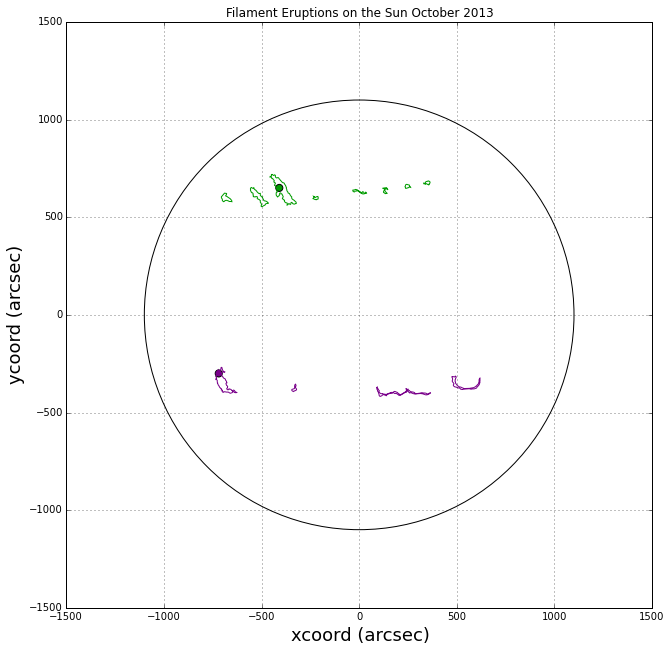

In [8]:
####makes a colorscale for the eruptions
colorscale=[]
norm = mpl.colors.Normalize(vmin=0, vmax=280)
cmap = plt.get_cmap('nipy_spectral')
m = cm.ScalarMappable(norm=norm, cmap=cmap)
for item in contained: #plotting those filaments that have eruptions contained within them
    scale1= m.to_rgba(item) 
    colorscale.append(scale1)

####plots eruptions/sun 
plt.grid(True)
plt.ylabel('ycoord (arcsec)',fontsize=18)
plt.xlabel('xcoord (arcsec)',fontsize=18)
plt.axis([-1500, 1500, -1500, 1500])
longitude = [elem["hpc_x"]for elem in filtered2]
latitude = [elem["hpc_y"] for elem in filtered2]
fig=plt.scatter(longitude,latitude,c= colorscale,s=50)
Sun=plt.Circle((0,0), radius=1100, color='black', fill=False)
plt.gcf().gca().add_artist(Sun)
plt.title('Filament Eruptions on the Sun October 2013')
fig1 = plt.gcf()
fig1.set_size_inches(10.5,10.5)
ax = fig1.add_subplot(111)
ax.set_aspect('equal') 

####plots filament tracks 
for poly in good_polygons: 
    scale=m.to_rgba(poly[0])
    plot_polygon=plt.Polygon(loads(poly[1]).exterior,color=scale,linewidth=1,fill=None)
    fig1.gca().add_artist(plot_polygon)
plt.show()

#original call 
#for poly in good_polygons:
    #SetupSunPlotColor(poly[0], poly[1])
#SetupSunPlotColor(filtered2, poly[0], poly[1])  

In [9]:
#for poly in everything: #plotting those filaments that have eruptions contained within them
    #PracticePlot(filtered2, poly[0], poly[1], poly[2]) #filament eruption coordinates, track number, track polygon coordinates

# The following kernel looks at both "good tracks" (tracks with 3 or more elements) and "filtered" eruption data (data that does not occur at multiple wavelengths). The code loops through the list of filtered eruptions and checks if any eruption box intersects with a good track (also iterated through with a loop).

In [10]:
margin = datetime.timedelta(hours=12)             
FT_time = good_tracks['HEK_time']    #Finds the time stamps for all the filaments
FE_time = [elem["event_starttime"] for elem in filtered] #Finds the time stamps for all the eruptions
FT_poly = good_tracks['HPC_BB_Poly'] 
FE_box = [elem["hpc_bbox"] for elem in filtered] 
FE_coords = [elem["hpc_coord"] for elem in filtered]
intersected=[] #the tracks that intersect with eruption boxes
event=[]  #eruption point 
manypoly=[] #center point of filament
erupno=[]   #eruption's number 
time_erup=[]
########## to only plot certain eruptions
for j in range(0, len(FE_box)):    #looks at all possible eruptions 
    FET=(parse_time(FE_time[j]))
    FE_box_obj = loads(FE_box[j]) #creates a shapely box object object
    FE_point_obj=loads(FE_coords[j])
    for i in range(0, len(FT_poly)):  #looks at all possible tracks 
        if pd.isnull(FT_poly[i]):   #skips over tracks of less than 3 elements 
            pass
        else:    
            FLT=parse(FT_time[i])
            FT_poly_obj = loads(FT_poly[i])   #creates polygon object from track
            if FT_poly_obj.intersects(FE_box_obj) and FET-margin <= FLT <= FET + margin: #checks if box intersects with polygon
                intersected.append(good_tracks['Track No.'][i])   #finds the track number of these tracks 
                #print "This means that the eruption bounding box intersects with the filament polygon"
                manypoly.append(loads(good_tracks['HPC_Center'][i]))  #grabs the center point coords of the filament 
                event.append(FE_point_obj)      #grabs the eruption point 
                erupno.append(j)
                time_erup.append(FET)
multi=zip(intersected, event, manypoly, erupno, time_erup) #creates a list of tuples of [(track no, eruption polygon point, filament polygon point, iteration).

# the following filters the "intersected" list of tracks further by finding those tracks with center point CLOSEST to the coordinates of each eruption. thus, the number of tracks should equal the number of eruptions 

In [11]:
dist=[]  ###will be a list of distances between the eruptions and center of the filaments 
final_erup=[]   #eruption's number
practice=[]
for item in multi:
     dist.append(item[1].distance(item[2]))

        
#multi2=zip(intersected, event, dist, erupno, time_erup)  #this is a new tuple for (track no, eruption coord, distance to filament, eruption number)

#next line makes a list of finding the minimum values based on distance, grouped by eruption number (1 distance per eruption)
#min_erup = list(min(v, key=operator.itemgetter(2)) for k, v in itertools.groupby(multi2, operator.itemgetter(3)))
#next line makes a list of finding the minimum values based on distance, grouped by track number (1 distance per track)
#min_track= list(min(v, key=operator.itemgetter(2)) for k,v in itertools.groupby(min_erup, operator.itemgetter(0)))


##the following is Nicole's code using pandas
multi3=zip(intersected, event, dist, erupno, time_erup) #This is what you did
test = pd.DataFrame(multi3) #Turn multi3 into a pandas dataframe
columns=['Track No.','Eruption Coord','Distance to filament','Eruption No.', 'Eruption Time'] #Name the columns so they are easier to deal with
test.columns=columns
idx = test.groupby(['Track No.'])['Distance to filament'].transform(min) == test['Distance to filament']
only_min=test[idx]
only_min = only_min.sort('Track No.')
close=[]   #those tracks closest to the eruptions 
corresponding=[] ### just to know which tracks correspond to which eruption 
for index, item in only_min.iterrows():
    close.append(item[0])   #for the tracks 
    final_erup.append(item[3])   #for the eruptions 
    corresponding.append((item[0], item[3]))   # to see which tracks correspond to which eruptions
    practice.append((item[4], item[0]))
print corresponding    
    
erupbox_with_track=[indices[i] for i in final_erup]
filtered3=[eruptions[i] for i in erupbox_with_track]




[(16.0, 1), (59.0, 4), (60.0, 2), (61.0, 2), (62.0, 2), (84.0, 7), (109.0, 7), (127.0, 9), (130.0, 9), (134.0, 9), (150.0, 13), (152.0, 9), (185.0, 13), (204.0, 12), (205.0, 12), (207.0, 16), (209.0, 12), (215.0, 15), (226.0, 12), (227.0, 13), (231.0, 12), (232.0, 12), (233.0, 15), (245.0, 17), (256.0, 17)]


In [12]:
okay_polygons=[] #Trying to find polygon data for the filaments that intersect with eruption box
for i in range(len(good_tracks)): #iterating through the whole list of tracks 
    #if good_tracks['Track No.'][i] in intersected and good_tracks['Track No.'][i] in okay_filaments:   #if the track number is in the list created previously 
    if good_tracks['Track No.'][i] in close: 
            okay_polygons.append((good_tracks['Track No.'][i],good_tracks['HPC_BB_Poly'][i])) #append the polygon data to good polygons

# Plots filament tracks versus the eruptions on the surface of the Sun

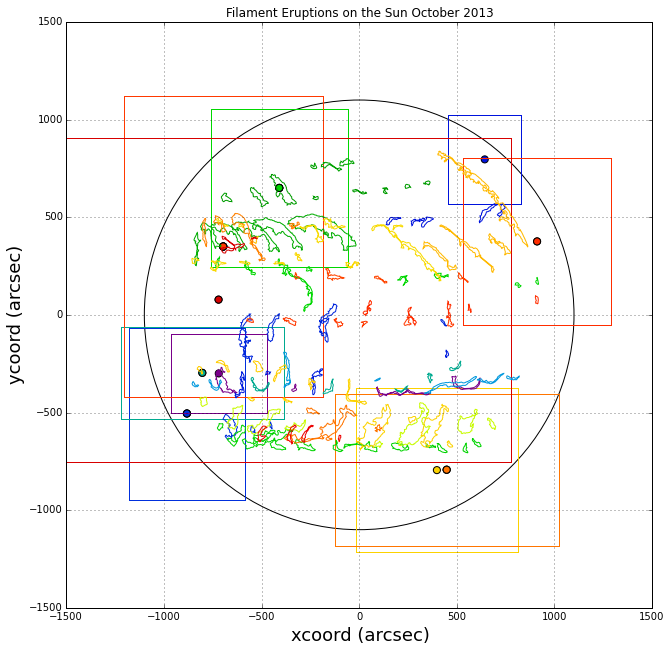

In [13]:
####makes a colorscale for eruptions 
colorscale2=[]
norm = mpl.colors.Normalize(vmin=0, vmax=280)
cmap = plt.get_cmap('nipy_spectral')
m = cm.ScalarMappable(norm=norm, cmap=cmap)
for item in close: #plotting those filaments that have eruptions contained within them
    scaleR= m.to_rgba(item) 
    colorscale2.append(scaleR)
    
####plots eruptions/sun
plt.grid(True)
plt.ylabel('ycoord (arcsec)',fontsize=18)
plt.xlabel('xcoord (arcsec)',fontsize=18)
plt.axis([-1500, 1500, -1500, 1500])
longitude = [elem["hpc_x"]for elem in filtered3]
latitude = [elem["hpc_y"] for elem in filtered3]
fig=plt.scatter(longitude,latitude,c= colorscale2,s=50)
Sun=plt.Circle((0,0), radius=1100, color='black', fill=False)
plt.gcf().gca().add_artist(Sun)
plt.title('Filament Eruptions on the Sun October 2013')
fig1 = plt.gcf()
fig1.set_size_inches(10.5,10.5)
ax = fig1.add_subplot(111)
ax.set_aspect('equal')

####plots eruption boxes 
box = [elem["hpc_bbox"] for elem in filtered3]    #plotting only those eruptions boxes that intersect with filaments
boxinfo=zip(box, close)
for item in boxinfo:
        scaleR= m.to_rgba(item[1])
        plot_box=plt.Polygon(loads(item[0]).exterior,color=scaleR,linewidth=1,fill=None)
        fig1.gca().add_artist(plot_box)
        
###plots filament tracks         
for poly in okay_polygons: #plotting those filaments that intersect the bounding box of eruptions
    scale2=m.to_rgba(poly[0])
    plot_polygon=plt.Polygon(loads(poly[1]).exterior,color=scale2,linewidth=1,fill=None)
    fig1.gca().add_artist(plot_polygon)
plt.show()

# Plots each track seperately versus the eruptions

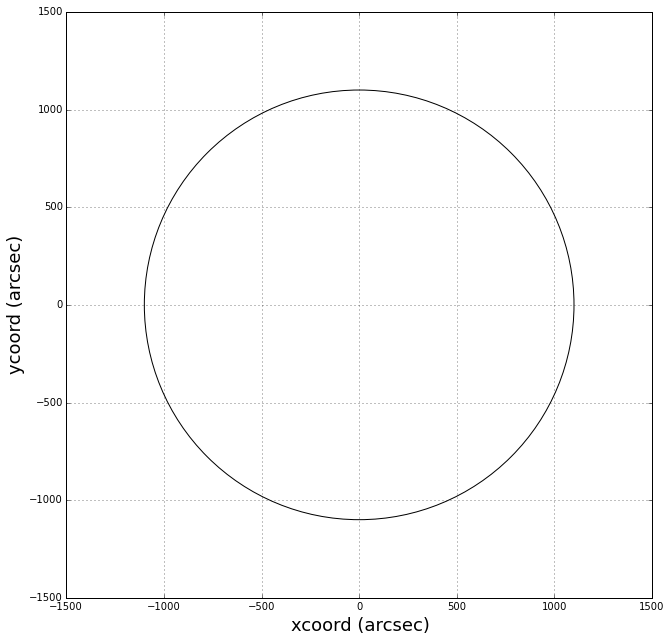

2013-10-02 23:10:03
2013-10-02 23:10:03
2013-10-02 23:10:03
2013-10-02 23:10:03
2013-10-02 23:10:03


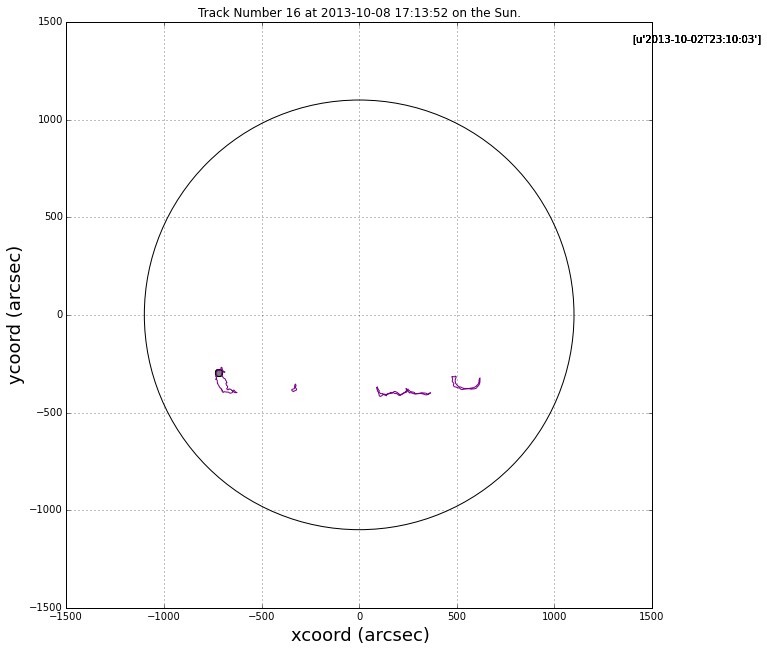

2013-10-11 15:00:11
2013-10-11 15:00:11
2013-10-11 15:00:11
2013-10-11 15:00:11
2013-10-11 15:00:11


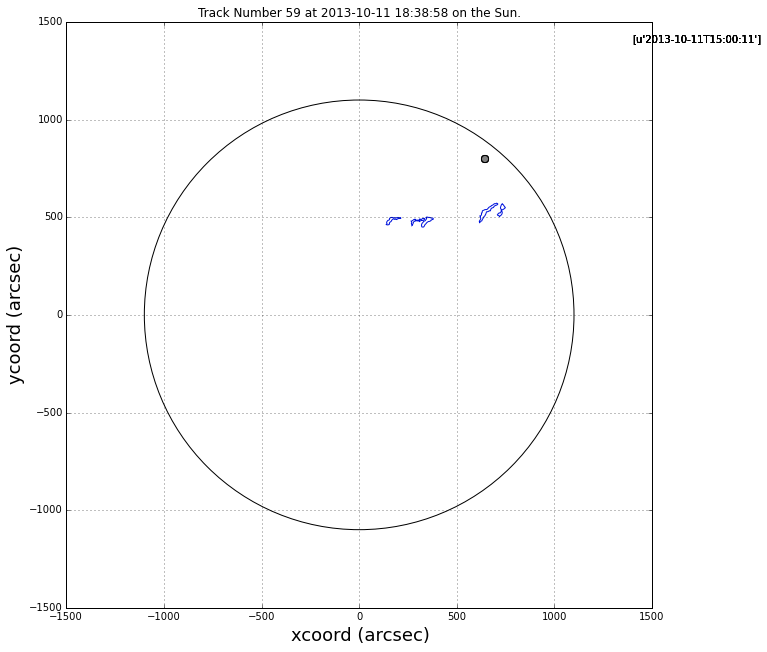

2013-10-06 18:06:03
2013-10-06 18:06:03
2013-10-06 18:06:03
2013-10-06 18:06:03


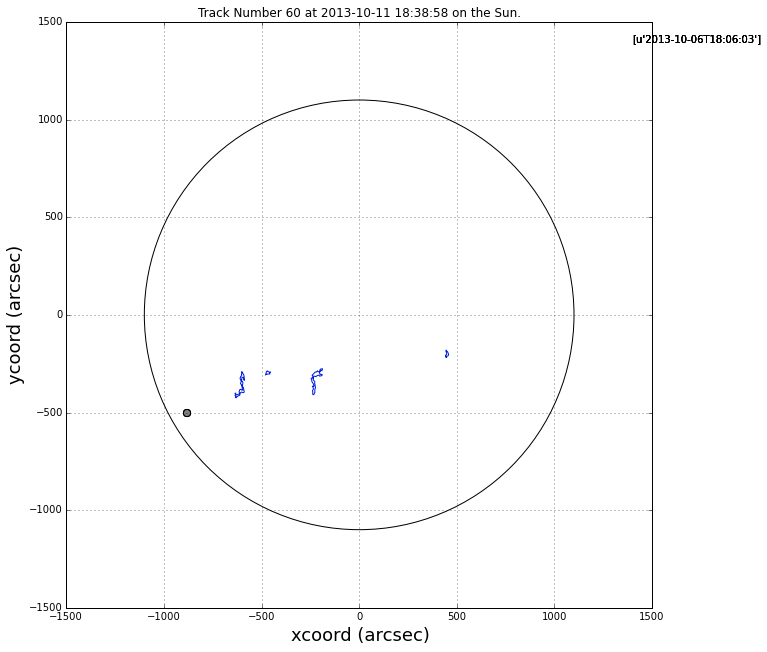

2013-10-06 18:06:03
2013-10-06 18:06:03
2013-10-06 18:06:03
2013-10-06 18:06:03


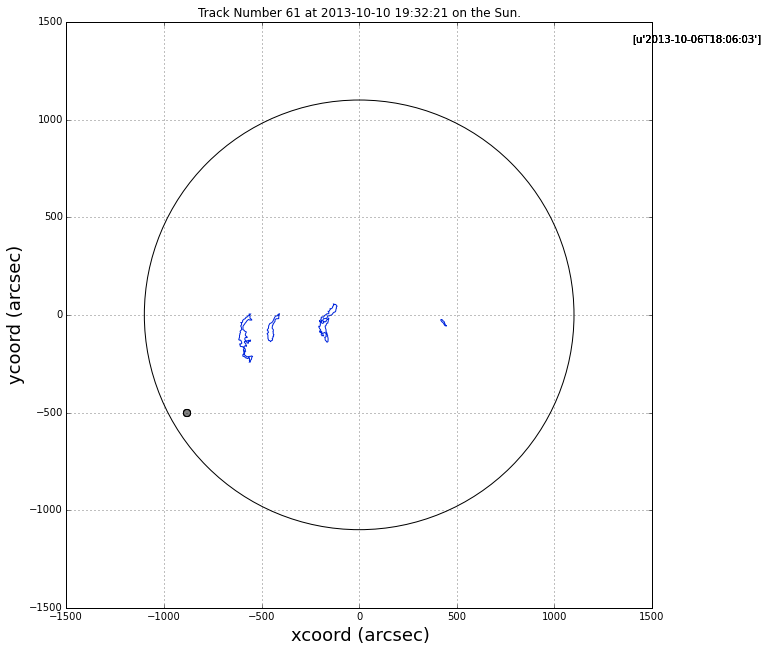

2013-10-06 18:06:03
2013-10-06 18:06:03
2013-10-06 18:06:03


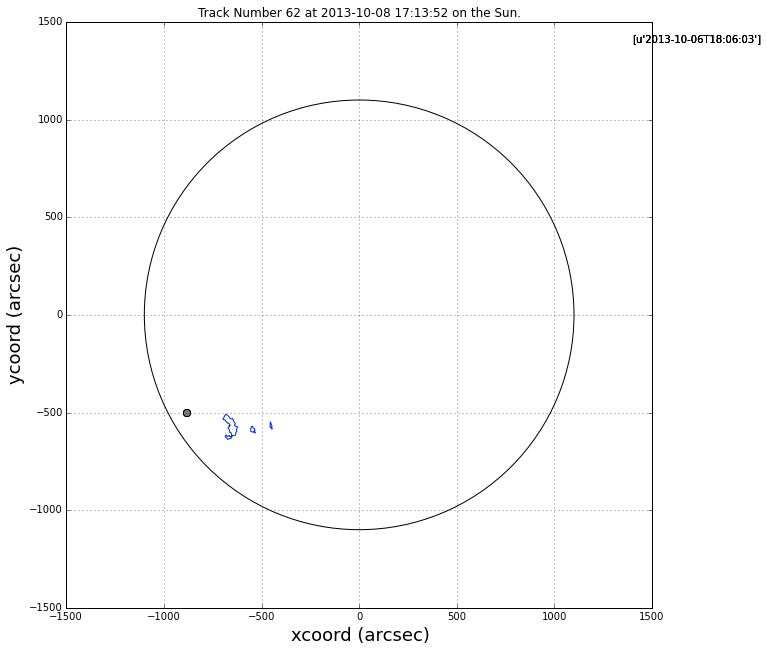

2013-10-13 06:45:35
2013-10-13 06:45:35
2013-10-13 06:45:35
2013-10-13 06:45:35
2013-10-13 06:45:35
2013-10-13 06:45:35
2013-10-13 06:45:35


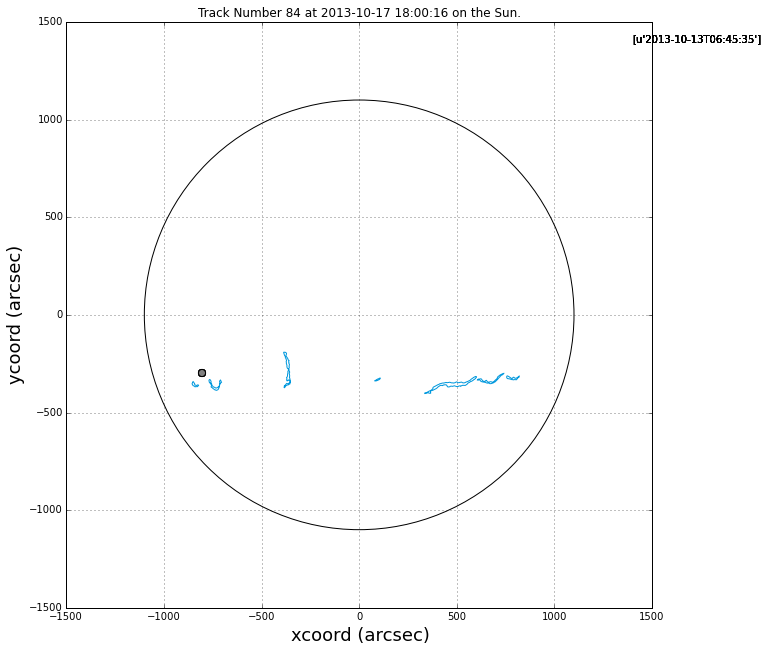

2013-10-13 06:45:35
2013-10-13 06:45:35
2013-10-13 06:45:35
2013-10-13 06:45:35
2013-10-13 06:45:35


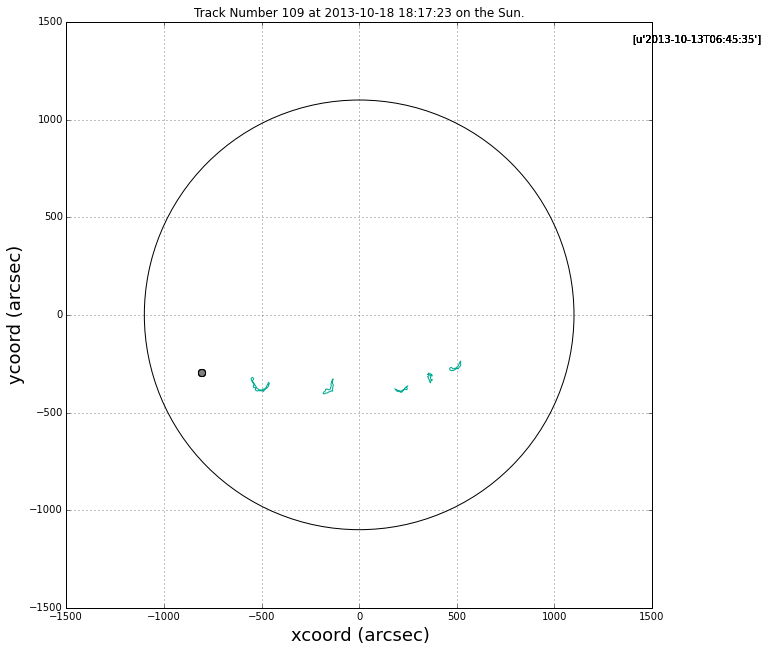

2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03


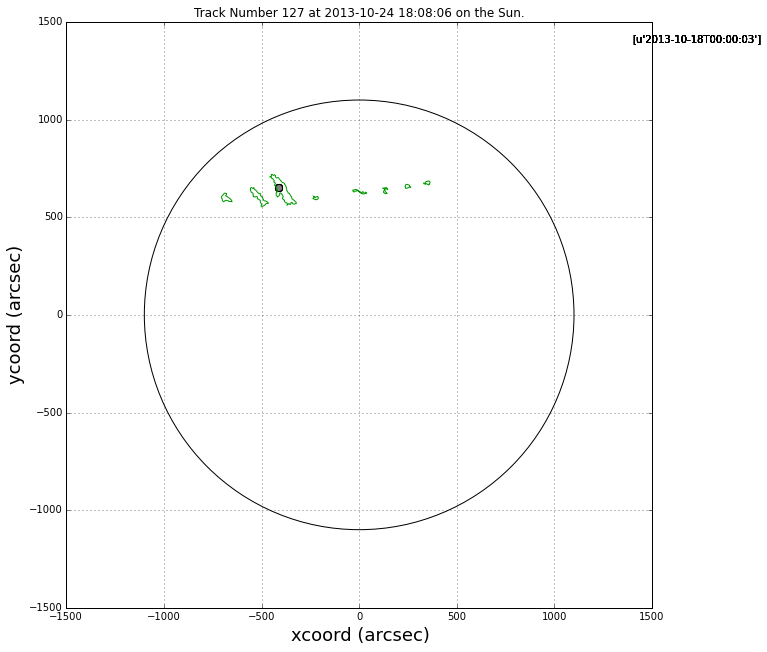

2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03


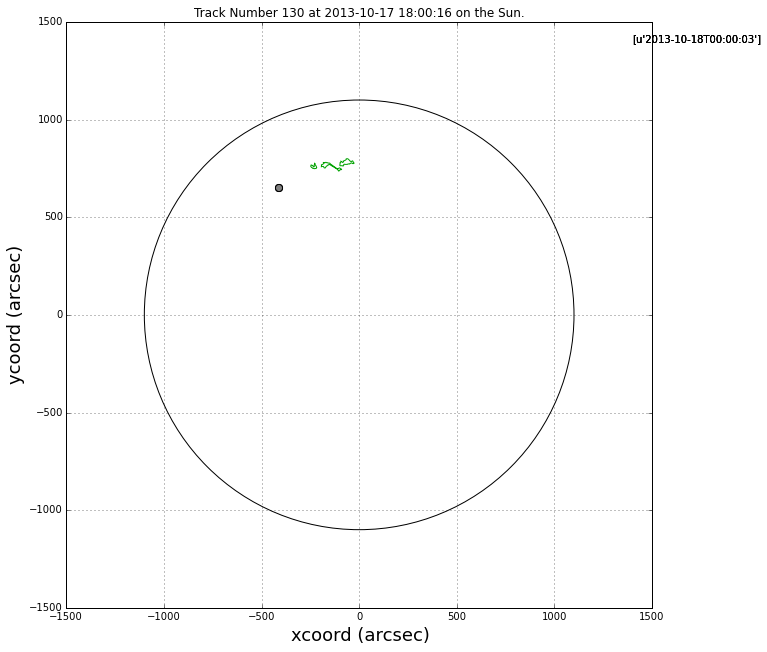

2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03


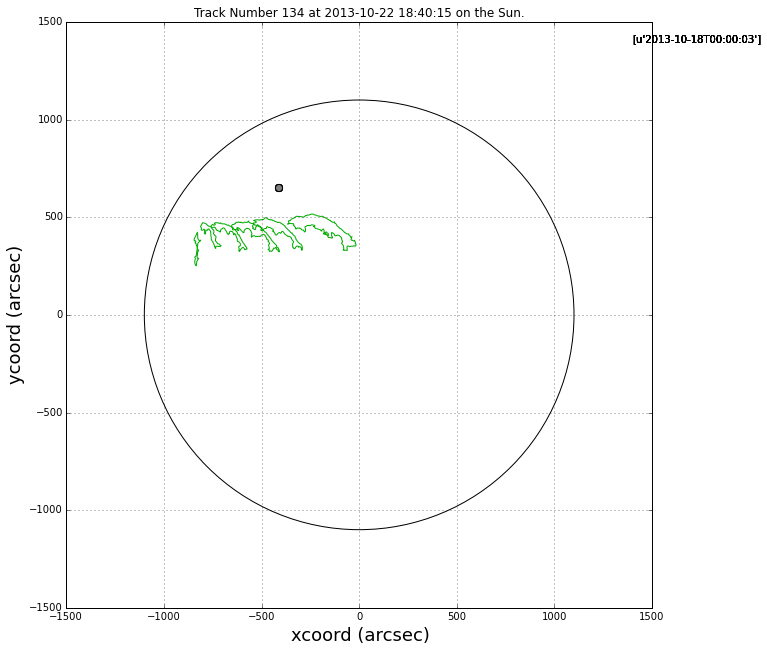

2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03


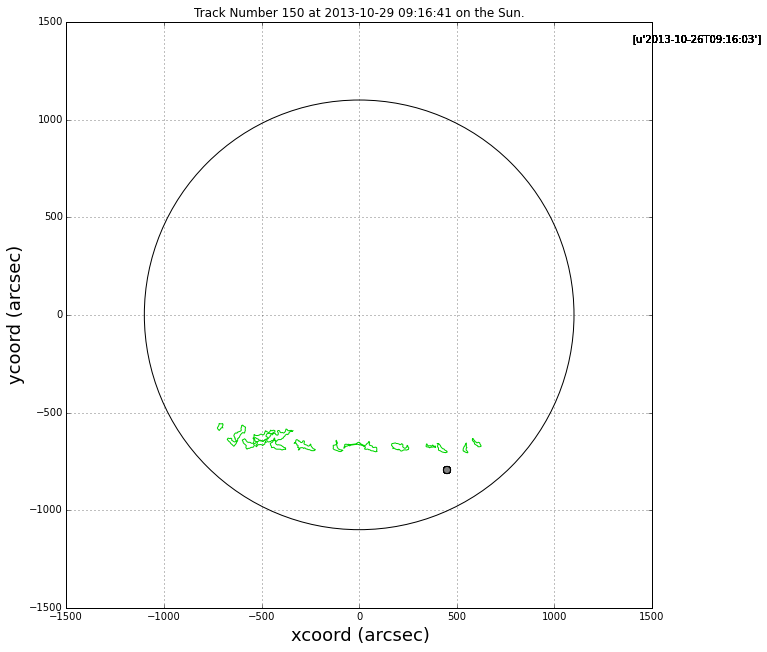

2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03
2013-10-18 00:00:03


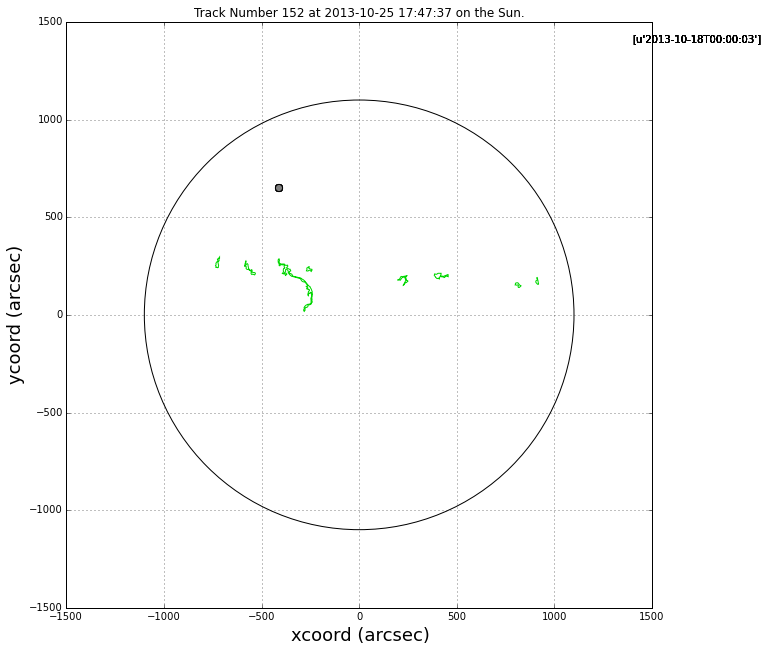

2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03


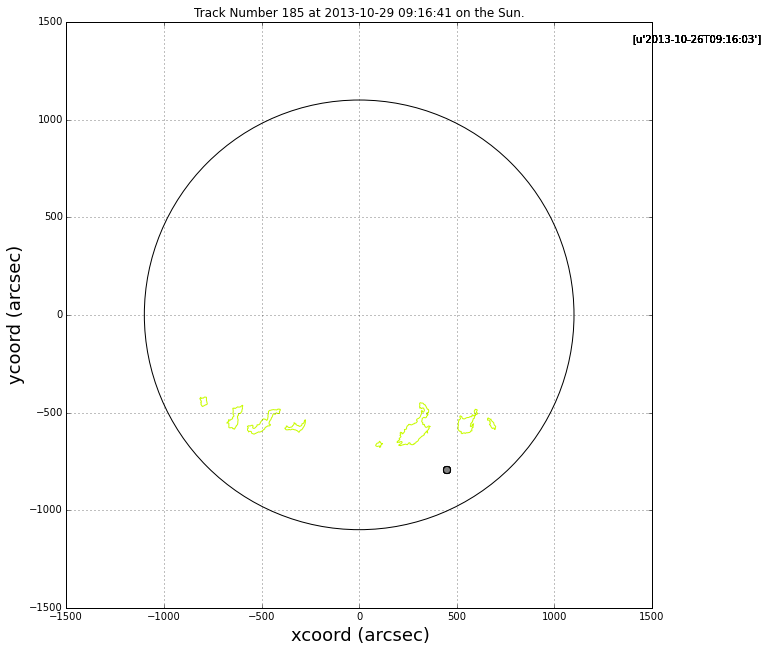

2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03


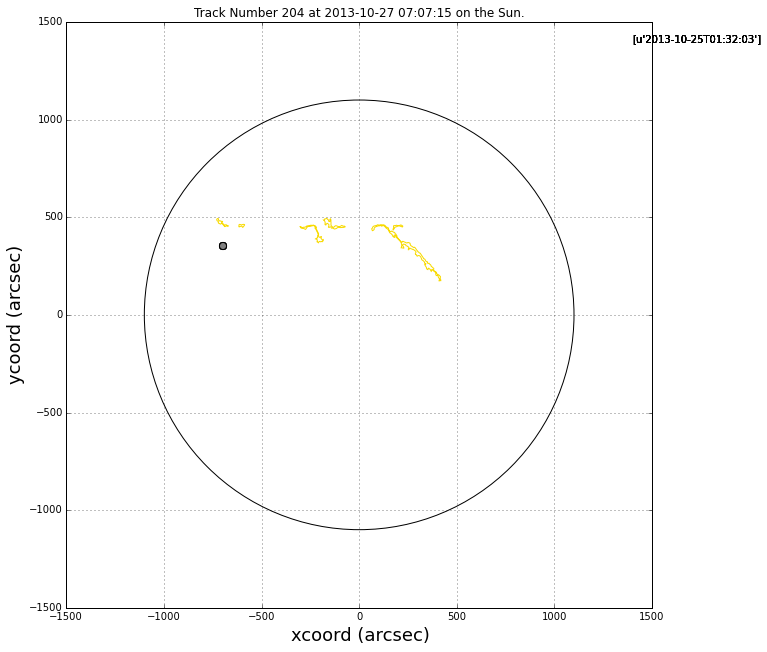

2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03


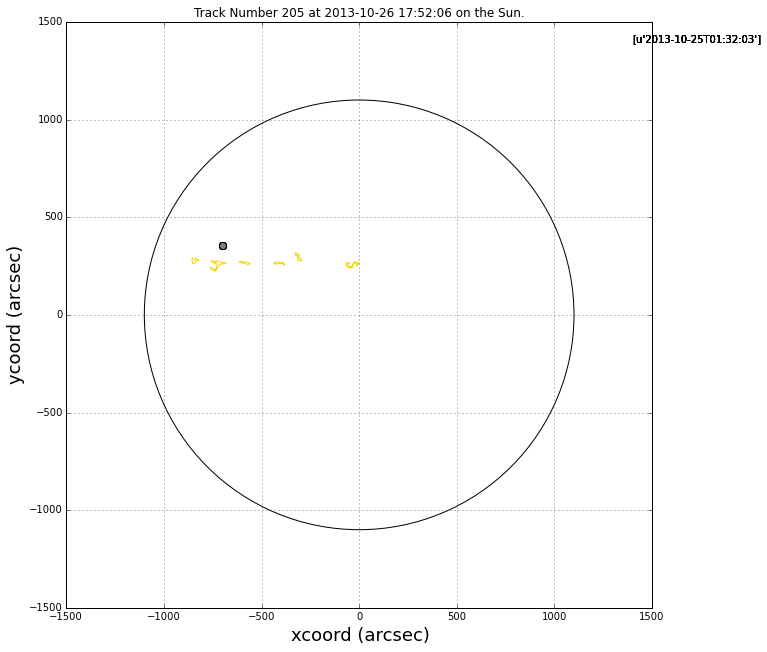

2013-10-28 10:28:03
2013-10-28 10:28:03
2013-10-28 10:28:03
2013-10-28 10:28:03
2013-10-28 10:28:03
2013-10-28 10:28:03
2013-10-28 10:28:03


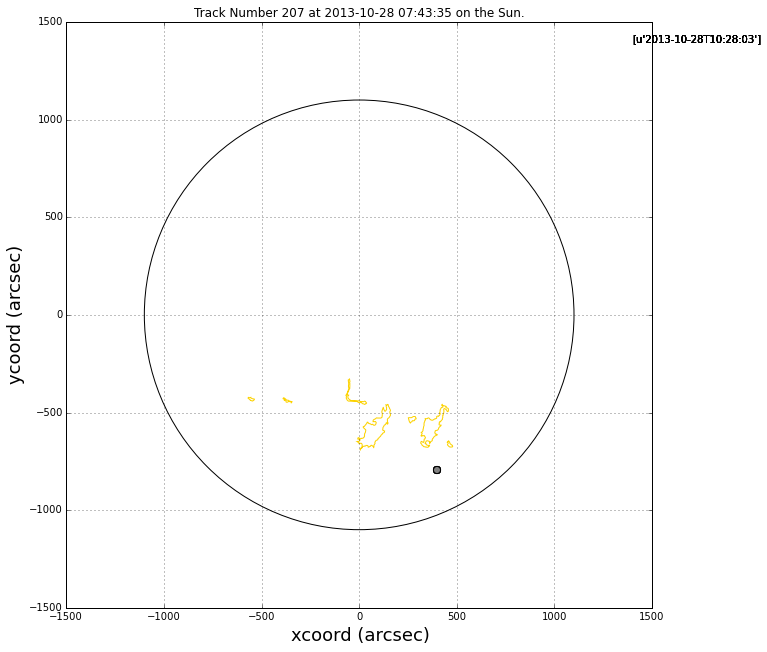

2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03


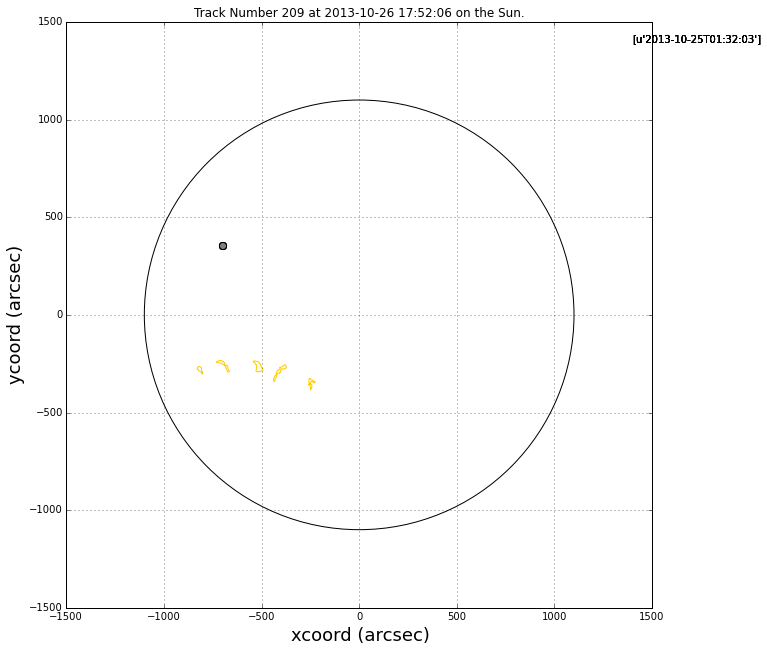

2013-10-28 02:42:03
2013-10-28 02:42:03
2013-10-28 02:42:03
2013-10-28 02:42:03
2013-10-28 02:42:03


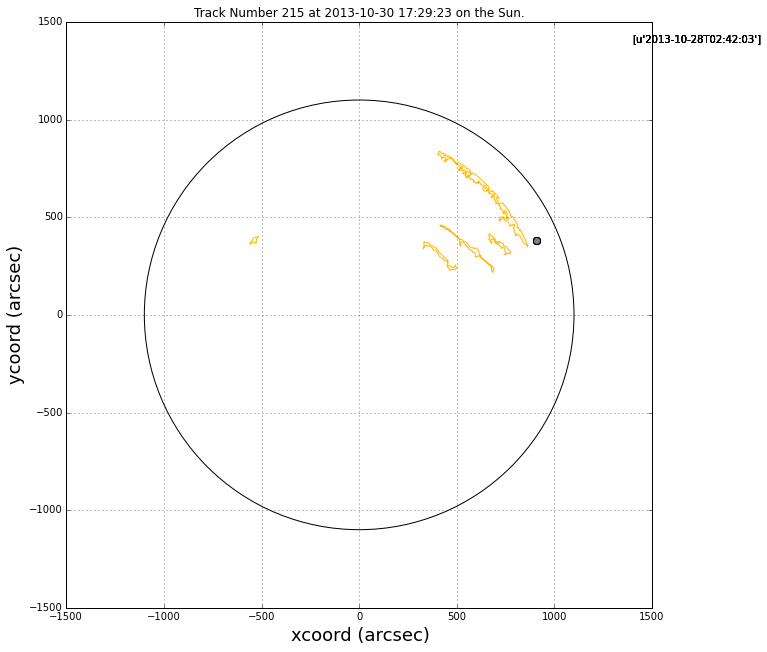

2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03


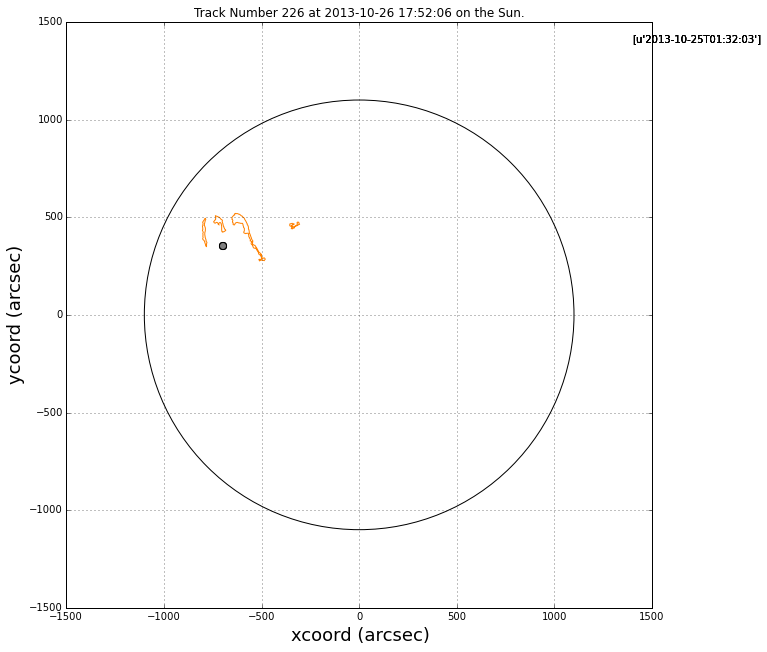

2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03
2013-10-26 09:16:03


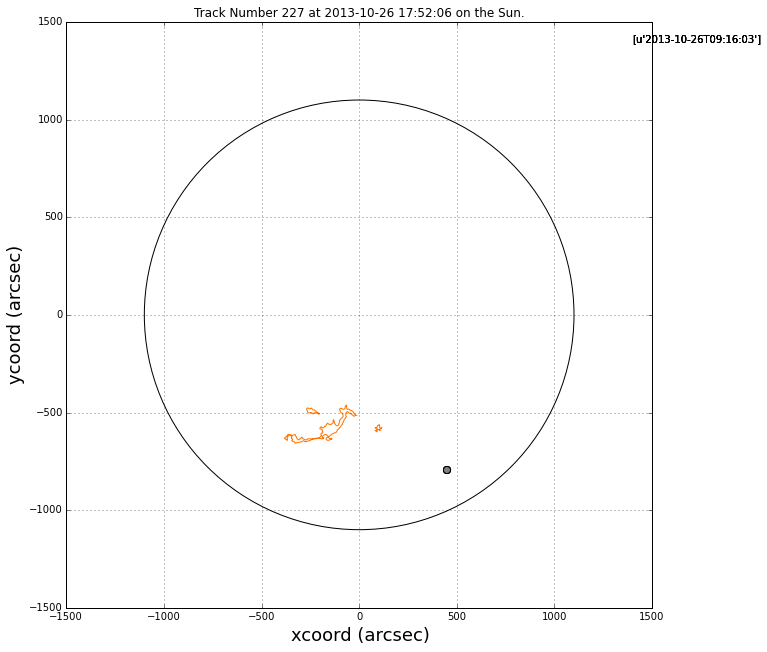

2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03


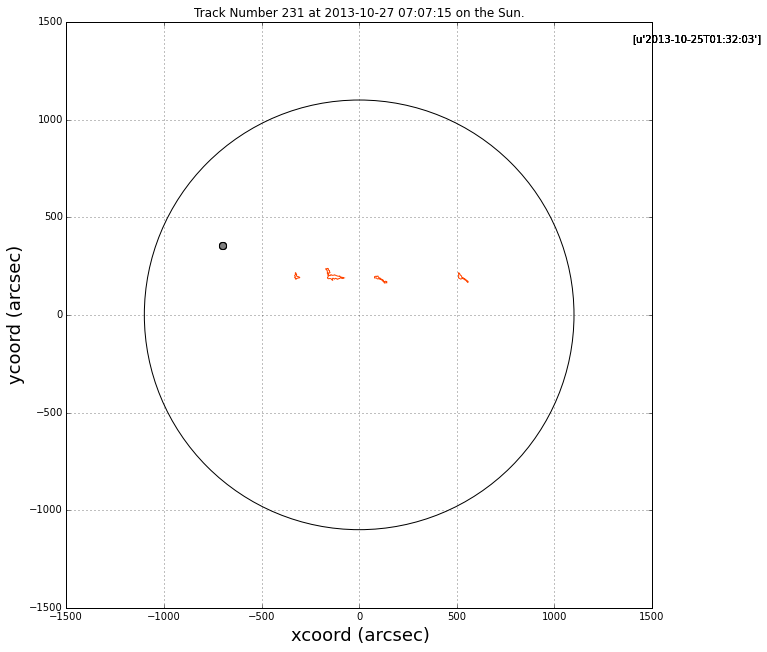

2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03
2013-10-25 01:32:03


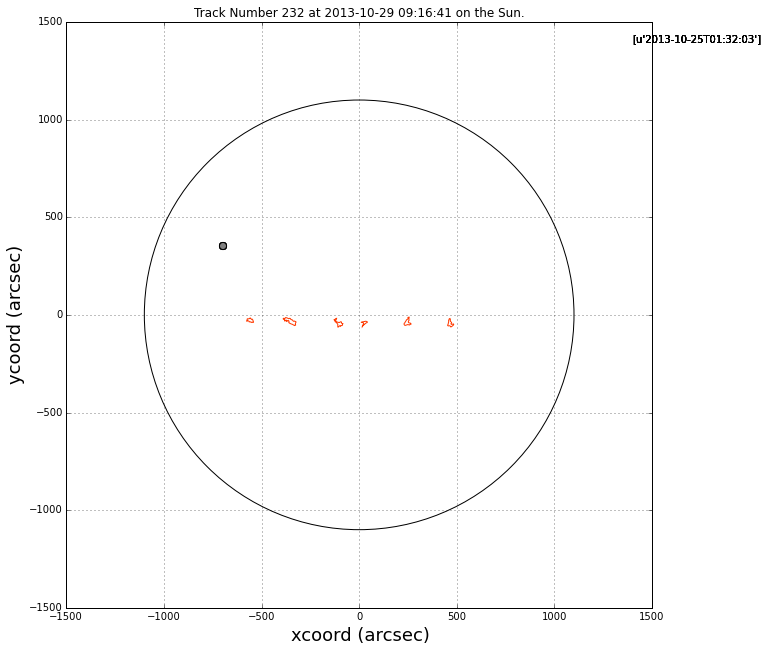

2013-10-28 02:42:03
2013-10-28 02:42:03
2013-10-28 02:42:03
2013-10-28 02:42:03
2013-10-28 02:42:03


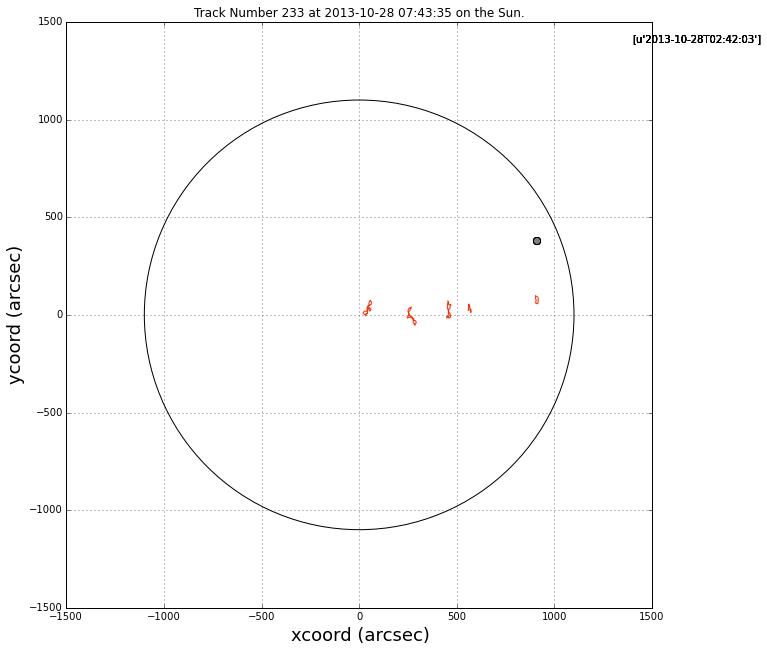

2013-10-28 13:14:03
2013-10-28 13:14:03
2013-10-28 13:14:03
2013-10-28 13:14:03


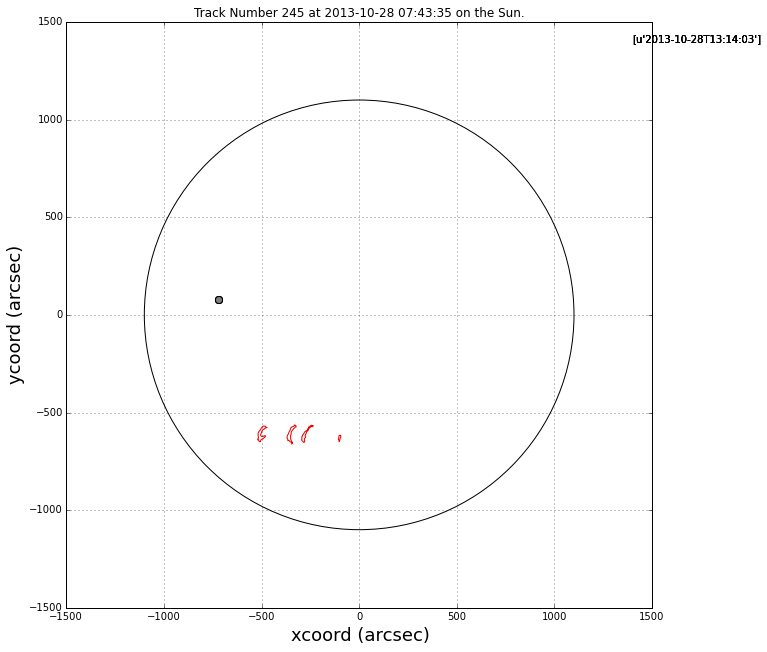

In [14]:
   ###new updated eruption list for each track 
tot=[]
unique=[]
erupind=[]
close_unique=np.unique(close)
for tracks in close_unique:
    tot.append(unique)
    unique=[]
    for i in range(0, len(good_tracks)):
        if tracks == good_tracks['Track No.'][i]:
            unique.append(i)
            
for item in tot:
    colorscale2=[]
    norm = mpl.colors.Normalize(vmin=0, vmax=280)
    cmap = plt.get_cmap('nipy_spectral')
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    for thing1 in close: #plotting those filaments that have eruptions contained within them
        scaleR= m.to_rgba(thing1) 
        colorscale2.append(scaleR)
####plots eruptions/sun
    plt.grid(True)
    plt.ylabel('ycoord (arcsec)',fontsize=18)
    plt.xlabel('xcoord (arcsec)',fontsize=18)
    plt.axis([-1500, 1500, -1500, 1500])
    #filtered4=[eruptions[i] for i in erupind]
    #longitude = [elem["hpc_x"]for elem in filtered3]
    #latitude = [elem["hpc_y"] for elem in filtered3]
    #fig=plt.scatter(longitude,latitude, c = colorscale2,s=50)
    fig1 = plt.gcf()
    Sun=plt.Circle((0,0), radius=1100, color='black', fill=False)
    plt.gcf().gca().add_artist(Sun)
    fig1.set_size_inches(10.5,10.5)
    ax = fig1.add_subplot(111)
    ax.set_aspect('equal')
        ##############################
    for i in range(0, len(item)):
        #filtered4=[]
        j=item[i]
        trnum=  good_tracks['Track No.'][j]
        stime=  good_tracks['HEK_time'][j]
        for thing1 in corresponding:
            if thing1[0] == trnum:
                erupind.append(thing1[1])
        verup=[indices[i] for i in erupind]   #getting the eruption index from a list of possible indices
        erupind=[]
        filtered4=[eruptions[k] for k in verup]
        longitude = [elem["hpc_x"]for elem in filtered4]
        latitude = [elem["hpc_y"] for elem in filtered4]
        erup_t = [elem["event_starttime"] for elem in filtered4]
        for thing2 in erup_t:
            tim=(parse_time(thing2))
            print tim
        plt.text(1400,1400,str(erup_t))
        fig=plt.scatter(longitude,latitude, c = 'grey',s=50)
        scale2=m.to_rgba(good_tracks['Track No.'][j])
        plot_polygon=plt.Polygon(loads(good_tracks['HPC_BB_Poly'][j]).exterior,color=scale2,linewidth=1,fill=None)
        fig1.gca().add_artist(plot_polygon)
        plt.title('Track Number %(Trackno)d at %(starttime)s on the Sun.' % {"Trackno" : trnum, "starttime": stime})
    plt.show()


In [15]:
tracknumbers_oct_2013=[]
good_track_no_oct_2013=[]
with open('Oct2013Track_eruptions.csv', 'rb') as f:    ###opens the excel document containing confirmed eruption track information
    reader = csv.reader(f)
    vdata = [row for row in csv.reader(f.read().splitlines())]   #splits the document by line
for row in vdata:
    tracknumbers_oct_2013.append(row[0])      ###appends just the track number
for i in range(0, 2):
    tracknumbers_oct_2013.pop(i)     #removes heading text for file 

tracknumbers_oct_2013.remove('')
for item in tracknumbers_oct_2013:      
    x=float(item)
    good_track_no_oct_2013.append(x)  #appends the track numbers as a float to a new list    #list of erupting tracks in workable format

# The next two kernels use the list "practice" which contains track number and associated eruption time, to make a new list called "step" which contains track number, polygon length, eruption time, and track time. then, they are plotted in a series of plots 


In [16]:
print good_track_no_oct_2013 #this a manual input list of all tracks that correlated to eurptions (visually)
find=list(set(close) & set(good_track_no_oct_2013))    #finds the intersection of tracks we have data for, and tracks that erupted 
step=[]
bad=[]
for p in practice:  #practice has track number associated with eruption time  
    for tracks in find:
        for i in range(0, len(good_tracks)):
            if good_tracks['Track No.'][i] == p[1]:   ##checks for the right eruption time 
                if good_tracks['Track No.'][i] == tracks:  ### next line should append time of each event, the trakc number, and the length of each polygon
                    if [tracks, parse(good_tracks['HEK_time'][i]), good_tracks['fi_length'][i], parse_time(p[0])] not in step:
                        step.append([tracks, parse(good_tracks['HEK_time'][i]), good_tracks['fi_length'][i], parse_time(p[0])])
for it in step:
    print it[0], it[3]

[16.0, 54.0, 62.0, 73.0, 127.0, 134.0, 185.0, 226.0, 227.0, 233.0]
16.0 2013-10-02 23:10:03
16.0 2013-10-02 23:10:03
16.0 2013-10-02 23:10:03
16.0 2013-10-02 23:10:03
16.0 2013-10-02 23:10:03
62.0 2013-10-06 18:06:03
62.0 2013-10-06 18:06:03
62.0 2013-10-06 18:06:03
127.0 2013-10-18 00:00:03
127.0 2013-10-18 00:00:03
127.0 2013-10-18 00:00:03
127.0 2013-10-18 00:00:03
127.0 2013-10-18 00:00:03
127.0 2013-10-18 00:00:03
127.0 2013-10-18 00:00:03
127.0 2013-10-18 00:00:03
134.0 2013-10-18 00:00:03
134.0 2013-10-18 00:00:03
134.0 2013-10-18 00:00:03
134.0 2013-10-18 00:00:03
134.0 2013-10-18 00:00:03
134.0 2013-10-18 00:00:03
134.0 2013-10-18 00:00:03
185.0 2013-10-26 09:16:03
185.0 2013-10-26 09:16:03
185.0 2013-10-26 09:16:03
185.0 2013-10-26 09:16:03
185.0 2013-10-26 09:16:03
185.0 2013-10-26 09:16:03
185.0 2013-10-26 09:16:03
185.0 2013-10-26 09:16:03
226.0 2013-10-25 01:32:03
226.0 2013-10-25 01:32:03
226.0 2013-10-25 01:32:03
226.0 2013-10-25 01:32:03
227.0 2013-10-26 09:16:03
227.0

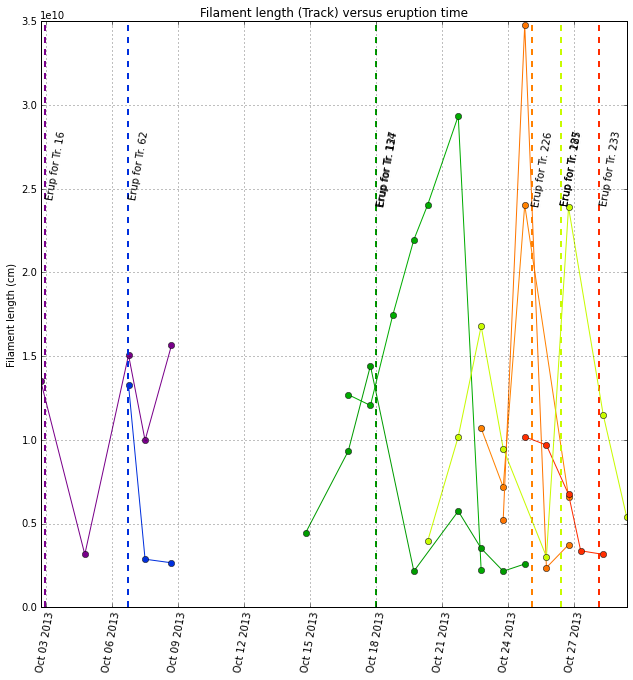

In [17]:
from matplotlib.dates import WeekdayLocator
colorscale2=[]
norm = mpl.colors.Normalize(vmin=0, vmax=280)
cmap = plt.get_cmap('nipy_spectral')
m = cm.ScalarMappable(norm=norm, cmap=cmap)
interest=[]
x=[]
y=[]
t=[]
for track in find:
    scale3=m.to_rgba(track)
    x=[] ### will be time data
    y=[] ## will be length data 
    r=[]
    t=[]
    interest=[]
    emp=[]
    for r in step:      #iterates through the data 
        if r[0] == track:  #finds the correct track
            if r not in interest:
                 interest.append(r)   #appends the data to a new list
    for k in range(0, len(interest)):
        t2= interest[k][3]
        t1=interest[k][1]
        t3=t2-t1
        t.append(t3.seconds)
        x.append(t1)
        y.append(interest[k][2])
    plt.plot_date(x, y, xdate=True,ydate=False, color=scale3, linestyle='-')
    plt.axvline(interest[k][3], linewidth=2, color=scale3, linestyle='--', label='eruption')
    plt.text(interest[k][3], 28000000000,'Erup for Tr. %(Trackno)d' %{"Trackno": track},rotation=80)
    #ax.xaxis.set_major_locator(AutoDateLocator())
    plt.title('Filament length (Track) versus eruption time')
    plt.grid(True)
    fig1 = plt.gcf()
    fig1.set_size_inches(10.5,10.5)
    plt.xticks( rotation= 80 )
    plt.ylabel('Filament length (cm)')
plt.show()

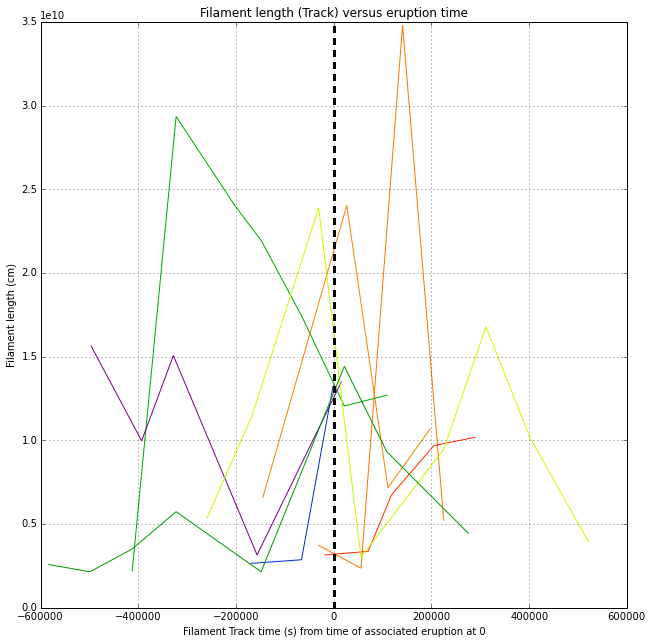

In [18]:
colorscale2=[]
norm = mpl.colors.Normalize(vmin=0, vmax=280)
cmap = plt.get_cmap('nipy_spectral')
m = cm.ScalarMappable(norm=norm, cmap=cmap)
interest=[]
x=[]
y=[]
t=[]
for track in find:
    scale3=m.to_rgba(track)
    x=[] ### will be time data
    y=[] ## will be length data 
    r=[]
    t=[]
    interest=[]
    emp=[]
    for r in step:      #iterates through the data 
        if r[0] == track:  #finds the correct track
            if r not in interest:
                 interest.append(r)   #appends the data to a new list
    for k in range(0, len(interest)):
        t2= interest[k][3]    ##eruption time
        t1=interest[k][1]    #filament time
        t3=timedelta.total_seconds(t2-t1) #difference between the two in seconds
        t.append(int(t3))
        y.append(interest[k][2])
    plt.plot(t, y, color=scale3)
    plt.axvline(0, linewidth=3, color='k', linestyle='--', label='Eruption')
    plt.title('Filament length (Track) versus eruption time')
    plt.grid(True)
    fig1 = plt.gcf()
    fig1.set_size_inches(10.5,10.5)
    plt.xlabel('Filament Track time (s) from time of associated eruption at 0')
    plt.ylabel('Filament length (cm)')
plt.show()

In [19]:
####finding the time of specific eruptions
index1=[12]
test=[filtered[i] for i in index1]
timeerup = [elem['event_starttime'] for elem in test]
print timeerup

[u'2013-10-25T01:32:03']


152 2013-10-17 18:00:16
152 2013-10-18 18:17:23
152 2013-10-19 17:21:00
152 2013-10-20 08:22:09
152 2013-10-21 17:42:11
152 2013-10-22 18:40:15
152 2013-10-24 18:08:06
152 2013-10-25 17:47:37


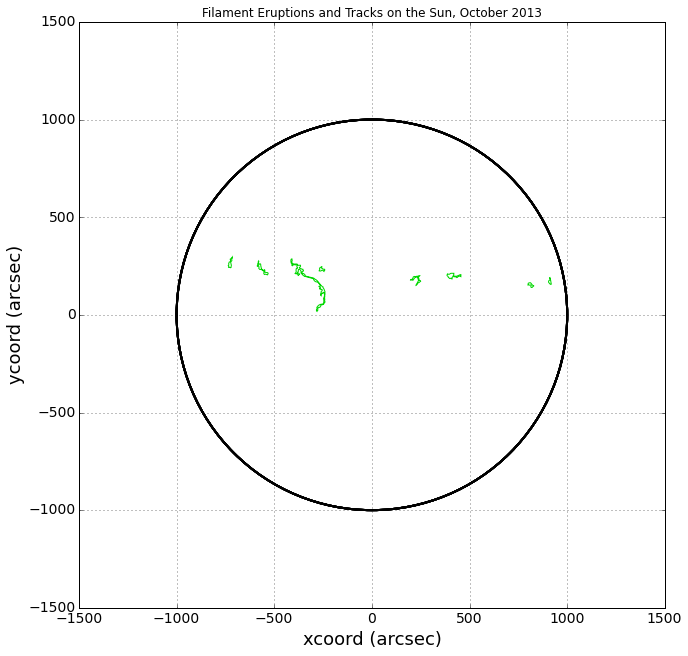

In [49]:
#### to check tracks that aren't "good" for some reason 
noerup=[]
check_track1=[152.0]
check_poly1=[]
for i in range(len(good_tracks)): #iterating through the whole list of tracks 
    #if good_tracks['Track No.'][i] in intersected and good_tracks['Track No.'][i] in okay_filaments:   #if the track number is in the list created previously 
    if fi_tracked['Track No.'][i] in check_track1: 
            check_poly1.append((fi_tracked['Track No.'][i],fi_tracked['HPC_BB_Poly'][i])) #append the polygon data to good polygons
            print fi_tracked['Track No.'][i],fi_tracked['HEK_time'][i]
for poly in check_poly1: #plotting those filaments that have eruptions contained within them
    SetupSunPlotColor(noerup, poly[0], poly[1]) #filament eruption coordinates, track number, track polygon coordinates



# finding more transiting tracks

In [44]:
#### just for fun, trying to find tracks that transit the surface ? more tracks? 
fi_tracked = pd.read_csv('FIDustinTracked_2013_10.txt',delimiter='\t')
long_tracks = fi_tracked.groupby('Track No.').filter(lambda x: len(x['Track No.']) >= 8, dropna=False) 

In [45]:
#### for non-erupting/transit filaments 2013
###opens the csv file, pulls out 2013 track numbers 
tracknumbers_oct_2013=[]
good_track_no_oct_2013=[]
erup_info_oct_2013=[]
with open('Oct2013Track_eruptions.csv', 'rb') as f:    ###opens the excel document containing confirmed eruption track information
    reader = csv.reader(f)
    vdata = [row for row in csv.reader(f.read().splitlines())]   #splits the document by line
for row in vdata:
    tracknumbers_oct_2013.append(row[0])      ###appends just the track number
    erup_info_oct_2013.append((row[0], row[7]))
for i in range(0, 2):
    tracknumbers_oct_2013.pop(i)     #removes heading text for file 
    erup_info_oct_2013.pop(i)
######
del tracknumbers_oct_2013[0]
del erup_info_oct_2013[0]
##########
for item in tracknumbers_oct_2013:      
    x=float(item)
    good_track_no_oct_2013.append(x)  #appends the track numbers as a float to a new list 


In [46]:
tracknumbers_oct_2013_trans=[]
good_track_no_oct_2013_trans=[]
with open('Transit_tracks_oct_2013.csv', 'rb') as f:    ###opens the excel document containing confirmed eruption track information
    reader = csv.reader(f)
    vdata = [row for row in csv.reader(f.read().splitlines())]   #splits the document by line
for row in vdata:
    tracknumbers_oct_2013_trans.append(row[0])      ###appends just the track number
for i in range(0, 2):
    tracknumbers_oct_2013_trans.pop(i)     #removes heading text for file 
del tracknumbers_oct_2013_trans[0]
##########
for item in tracknumbers_oct_2013_trans:      
    x=float(item)
    good_track_no_oct_2013_trans.append(x)  #appends the track numbers as a float to a new list 
print good_track_no_oct_2013_trans

[97.0, 154.0, 166.0, 185.0, 72.0, 150.0]


In [47]:
big_initial=[]
big_final=[]
noerup=[]
for j in range(len(long_tracks)):
    if pd.isnull(long_tracks['Track No.'][j]): 
        pass
    else:
        big_initial.append(long_tracks['Track No.'][j])

for item in big_initial:
    if item not in good_track_no_oct_2013_trans and item not in good_track_no_oct_2013:
        big_final.append(item)
        
print len(big_initial)
print big_final
 

54
[23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 152.0, 152.0, 152.0, 152.0, 152.0, 152.0, 152.0, 152.0]


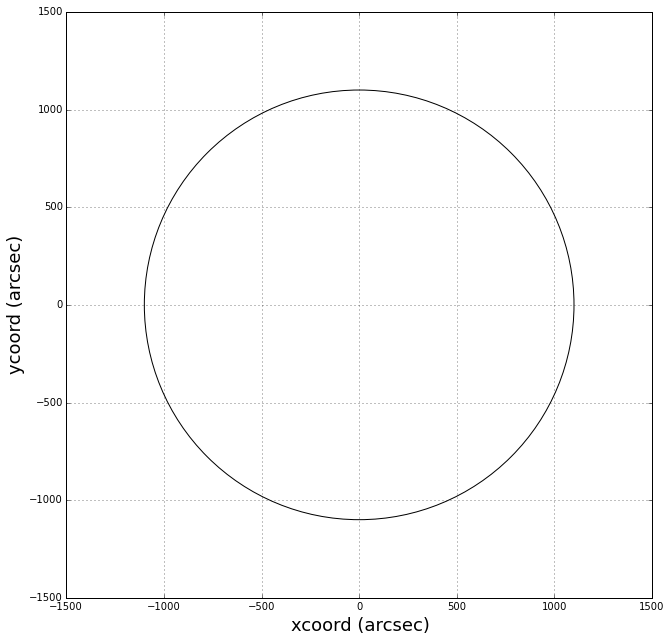

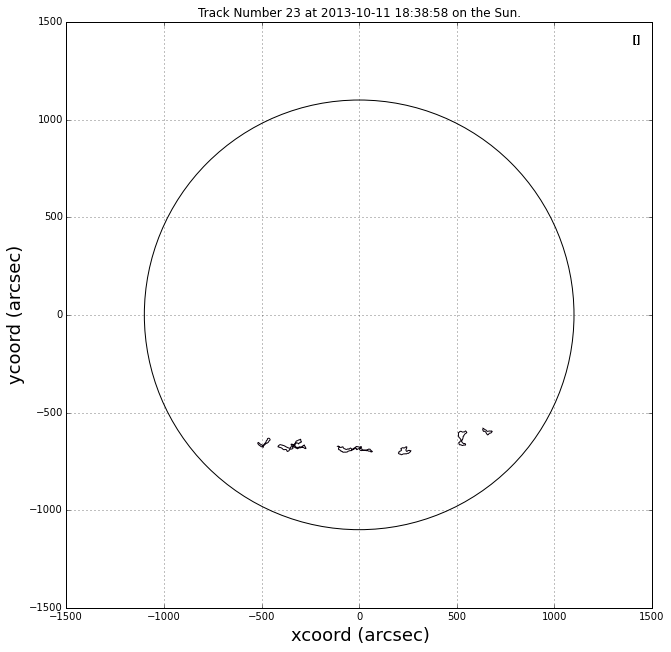

In [48]:
 ###new updated eruption list for each track 
tot=[]
unique=[]
erupind=[]
big_final_unique=np.unique(big_final)
for tracks in big_final_unique:
    tot.append(unique)
    unique=[]
    for i in range(0, len(good_tracks)):
        if tracks == good_tracks['Track No.'][i]:
            unique.append(i)
            
for item in tot:
    colorscale2=[]
    norm = mpl.colors.Normalize(vmin=0, vmax=3000)
    cmap = plt.get_cmap('nipy_spectral')
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    for thing1 in big_final: #plotting those filaments that have eruptions contained within them
        scaleR= m.to_rgba(thing1) 
        colorscale2.append(scaleR)
####plots eruptions/sun
    plt.grid(True)
    plt.ylabel('ycoord (arcsec)',fontsize=18)
    plt.xlabel('xcoord (arcsec)',fontsize=18)
    plt.axis([-1500, 1500, -1500, 1500])
    #filtered4=[eruptions[i] for i in erupind]
    #longitude = [elem["hpc_x"]for elem in filtered3]
    #latitude = [elem["hpc_y"] for elem in filtered3]
    #fig=plt.scatter(longitude,latitude, c = colorscale2,s=50)
    fig1 = plt.gcf()
    Sun=plt.Circle((0,0), radius=1100, color='black', fill=False)
    plt.gcf().gca().add_artist(Sun)
    fig1.set_size_inches(10.5,10.5)
    ax = fig1.add_subplot(111)
    ax.set_aspect('equal')
        ##############################
    for i in range(0, len(item)):
        j=item[i]
        trnum=  good_tracks['Track No.'][j]
        stime=  good_tracks['HEK_time'][j]
        for thing1 in corresponding:
            if thing1[0] == trnum:
                erupind.append(thing1[1])
        verup=[indices[i] for i in erupind]   #getting the eruption index from a list of possible indices
        erupind=[]
        filtered4=[eruptions[k] for k in verup]
        longitude = [elem["hpc_x"]for elem in filtered4]
        latitude = [elem["hpc_y"] for elem in filtered4]
        erup_t = [elem["event_starttime"] for elem in filtered4]
        for thing2 in erup_t:
            tim = (parse_time(thing2))
        plt.text(1400,1400,str(erup_t))
        fig=plt.scatter(longitude,latitude, c = 'grey',s=50)
        scale2=m.to_rgba(good_tracks['Track No.'][j])
        plot_polygon=plt.Polygon(loads(good_tracks['HPC_BB_Poly'][j]).exterior,color=scale2,linewidth=1,fill=None)
        fig1.gca().add_artist(plot_polygon)
        plt.title('Track Number %(Trackno)d at %(starttime)s on the Sun.' % {"Trackno" : trnum, "starttime": stime})
    plt.show()

# the following code is scratch code that I'm too scared to delete


In [26]:
def find(list):
    x=min(list)
    y=max(list)
    z=np.mean(list)
    print(("{:.4e}".format(x)), ("{:.4e}".format(y)), ("{:.4e}".format(z)))
    return x,y,z



tracklength=[]
length=[]
test=[]
for i in range(len(good_tracks)):
    if pd.isnull(good_tracks['fi_length'][i]):
        pass
    else:
        tracklength.append((good_tracks['Track No.'][i], good_tracks['fi_length'][i]))


for item in tracklength:
    length.append(item[1])
for item in tracklength:
    if item[0] in big:
        test.append(item[1])
        

find(length)
find(test)

('1.8656e+09', '5.0944e+10', '8.5840e+09')
('2.6548e+09', '1.7221e+10', '7.2698e+09')


(2654843390.0, 17220640800.0, 7269844614.090909)

In [27]:
margin = datetime.timedelta(hours=12)             
FT_time = good_tracks['HEK_time']    #Finds the time stamps for all the filaments
FE_time = [elem["event_starttime"] for elem in filtered] #Finds the time stamps for all the eruptions
good_times=[]    
for j in range(0,len(FE_time)):    #looks at all possible eruptions 
    FET=(parse_time(FE_time[j])) #creates a datetime object of the eruptions
    for i in range(0, len(FT_time)):  #looks at all possible tracks 
        if pd.isnull(FT_time[i]):   #skips over tracks of less than 3 elements 
            pass
        else:            
            FLT=parse(FT_time[i])   #creates a datetime object of the filaments
            if  FET-margin <= FLT <= FET + margin: #checks if the eruption occurs in the specified margn 
                good_times.append(good_tracks['Track No.'][i])   #finds the track number of these tracks 
                print FET, FLT       
print good_times


2013-10-02 23:10:03 2013-10-02 18:53:22
2013-10-02 23:10:03 2013-10-02 18:53:22
2013-10-02 23:10:03 2013-10-02 18:53:22
2013-10-02 23:10:03 2013-10-02 18:53:22
2013-10-02 23:10:03 2013-10-02 18:53:22
2013-10-02 23:10:03 2013-10-02 18:53:22
2013-10-02 23:10:03 2013-10-02 18:53:22
2013-10-02 23:10:03 2013-10-02 18:53:22
2013-10-02 23:10:03 2013-10-02 18:53:22
2013-10-02 23:10:03 2013-10-02 18:53:22
2013-10-02 23:10:03 2013-10-02 18:53:22
2013-10-02 23:10:03 2013-10-02 18:53:22
2013-10-06 18:06:03 2013-10-06 18:26:57
2013-10-06 18:06:03 2013-10-06 18:26:57
2013-10-06 18:06:03 2013-10-06 18:26:57
2013-10-06 18:06:03 2013-10-06 18:26:57
2013-10-06 18:06:03 2013-10-06 18:26:57
2013-10-06 18:06:03 2013-10-06 18:26:57
2013-10-06 18:06:03 2013-10-06 18:26:57
2013-10-06 18:06:03 2013-10-06 18:26:57
2013-10-06 18:06:03 2013-10-06 18:26:57
2013-10-06 18:06:03 2013-10-06 18:26:57
2013-10-06 18:06:03 2013-10-06 18:26:57
2013-10-06 18:06:03 2013-10-06 18:26:57
2013-10-06 18:06:03 2013-10-06 18:26:57


In [28]:
FE_poly = [elem["hpc_bbox"] for elem in eruptions] 
a = FE_poly[1]
print a
FE_coords = [elem["hpc_coord"] for elem in eruptions] 
print FE_coords[0]
FE_poly_obj = loads(a)
FE_point_obj = loads(FE_coords[0])
if FE_poly_obj.contains(FE_point_obj):
    print "This means that the eruption point is contained in the eruption polygon"

POLYGON((-964 -502,-473 -502,-473 -99,-964 -99,-964 -502))
POINT(459 -872)
